In [108]:
############################ Data Analysis & Calculation ############################

import numpy as np 
import pandas as pd 

############################ Ignore Warning  ############################
import warnings
warnings.filterwarnings("ignore")

############################ Data visualization ############################

import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
df = pd.read_excel(r"C:\Users\Yash Pardeshi\Downloads\advanced ML LMS\Flight_Price_Train.xlsx")
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [110]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# Q.1) Perform Feature Engineering
### a) Perform basic exploration like checking for top 5 records, shape, statistical info, duplicates, Null values etc.

In [111]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


 - Here are Top 5 records in the dataset

In [112]:
df.shape

(10683, 11)

In [113]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [114]:
df.select_dtypes(object).describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [116]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [117]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [118]:
### getting a row where we have missing value
df[df['Route'].isna() | df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [119]:
df.dropna(inplace=True)

In [120]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [121]:
df.duplicated().sum()

220

In [122]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

# b) Extract Date, Month, Year from Date of Journey column

In [123]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [124]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [125]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])

In [126]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [127]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [128]:
df['Day']=df['Date_of_Journey'].dt.day

In [129]:
df['Month']=df['Date_of_Journey'].dt.month

In [130]:
df['Year']=df['Date_of_Journey'].dt.year

In [131]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-01-13 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-01-13 05:50:00,2024-01-13 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2024-01-13 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2024-01-13 18:05:00,2024-01-13 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2024-01-13 16:50:00,2024-01-13 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2024-01-13 19:55:00,2024-01-13 22:25:00,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2024-01-13 20:45:00,2024-01-13 23:20:00,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2024-01-13 08:20:00,2024-01-13 11:20:00,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2024-01-13 11:30:00,2024-01-13 14:10:00,2h 40m,non-stop,No info,12648,3,1,2019


 - As we can observe a new column contains Day,Month,Year which is extracted from the Date of Journey

In [132]:
df['Dep_Time']=pd.to_datetime(df['Dep_Time'],format='%H:%M').dt.time

In [133]:
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'],format='%H:%M').dt.time

In [134]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,2h 30m,non-stop,No info,4107,4,9,2019
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,2h 40m,non-stop,No info,12648,3,1,2019


In [135]:
df['Depature_Hour'] = df['Dep_Time'].apply(lambda x: x.hour)
df['Depature_Min'] = df['Dep_Time'].apply(lambda x: x.minute)
df['Arrival_Hour'] = df['Arrival_Time'].apply(lambda x: x.hour)
df['Arrival_Min'] = df['Arrival_Time'].apply(lambda x: x.minute)

In [136]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Depature_Hour,Depature_Min,Arrival_Hour,Arrival_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,3h,non-stop,No info,7229,27,4,2019,8,20,11,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10


In [137]:
def flight_dep_time(x):
    if(x>4) and (x<=8):
        return 'Early Morning'
    elif(x>8) and (x<=12):
        return 'Morning'
    elif(x>12) and (x<=16):
        return 'Noon'
    elif(x>16) and (x<=20):
        return 'Evening'
    elif(x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late Night'

In [138]:
df['Depature_Timezone'] = df['Depature_Hour']. apply(flight_dep_time)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Depature_Hour,Depature_Min,Arrival_Hour,Arrival_Min,Depature_Timezone
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,Night
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,Early Morning
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,Morning
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,Evening
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,Noon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25,Evening
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,Evening
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,3h,non-stop,No info,7229,27,4,2019,8,20,11,20,Early Morning
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10,Morning


In [139]:
def flight_arr_time(x):
    if(x>4) and (x<=8):
        return 'Early Morning'
    elif(x>8) and (x<=12):
        return 'Morning'
    elif(x>12) and (x<=16):
        return 'Noon'
    elif(x>16) and (x<=20):
        return 'Evening'
    elif(x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late Night'
    

In [140]:
df['arrival_Timezone'] = df['Arrival_Hour']. apply(flight_arr_time)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Depature_Hour,Depature_Min,Arrival_Hour,Arrival_Min,Depature_Timezone,arrival_Timezone
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,Night,Late Night
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,Early Morning,Noon
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25:00,04:25:00,19h,2 stops,No info,13882,6,9,2019,9,25,4,25,Morning,Late Night
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,Evening,Night
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,Noon,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55:00,22:25:00,2h 30m,non-stop,No info,4107,4,9,2019,19,55,22,25,Evening,Night
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,2h 35m,non-stop,No info,4145,27,4,2019,20,45,23,20,Evening,Night
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20:00,11:20:00,3h,non-stop,No info,7229,27,4,2019,8,20,11,20,Early Morning,Morning
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30:00,14:10:00,2h 40m,non-stop,No info,12648,3,1,2019,11,30,14,10,Morning,Noon


# Q.2) Perform Exploratory Data Analysis (EDA) tasks
### a) Which airline is most preferred airline

In [141]:
airline_counts = df['Airline'].value_counts()


The most preferred airline is Jet Airways



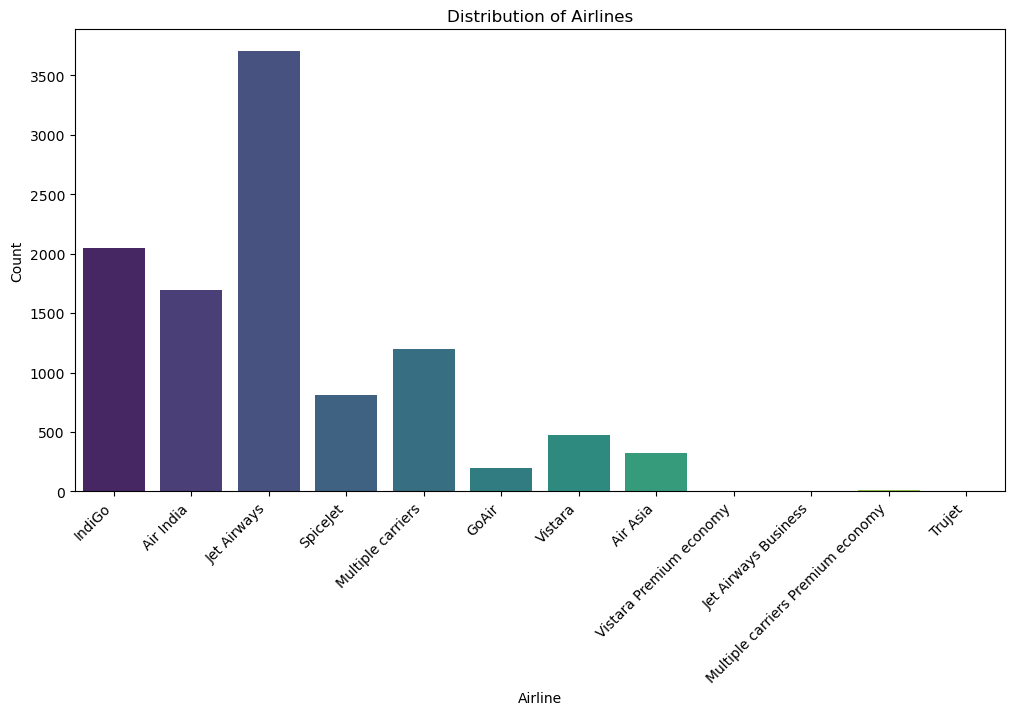

In [142]:
plt.figure(figsize=(12,6))
sns.countplot(x='Airline',data=df,palette='viridis')
plt.title('Distribution of Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show

prefered_airline=airline_counts.idxmax()

print (f"\nThe most preferred airline is {prefered_airline}\n" )

### As shown in the graph, Jet Airways is the most preferred airline.

# b) Find the majority of the flights take off from which source


The majority of the flights take off from source of Delhi



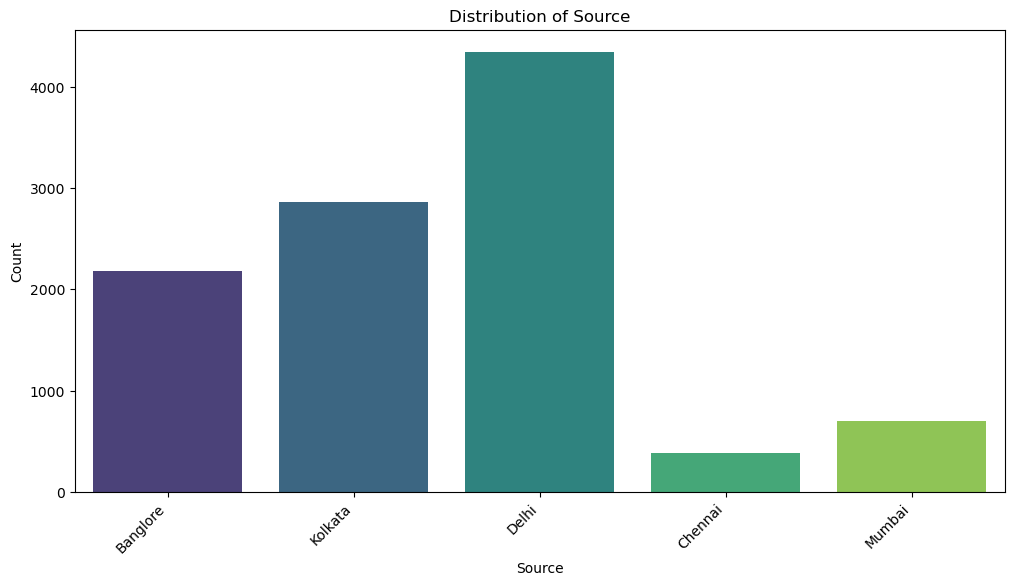

In [143]:
source_counts = df['Source'].value_counts()
plt.figure(figsize=(12,6))
sns.countplot(x='Source',data=df,palette='viridis')
plt.title('Distribution of Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show

prefered_source=source_counts.idxmax()

print (f"\nThe majority of the flights take off from source of {prefered_source}\n" )

## As shown in the graph, The majority of the flights take off from source of Delhi.

# c) Find maximum flights land in which destination


The destination with the maximum number of flights landing is Cochin



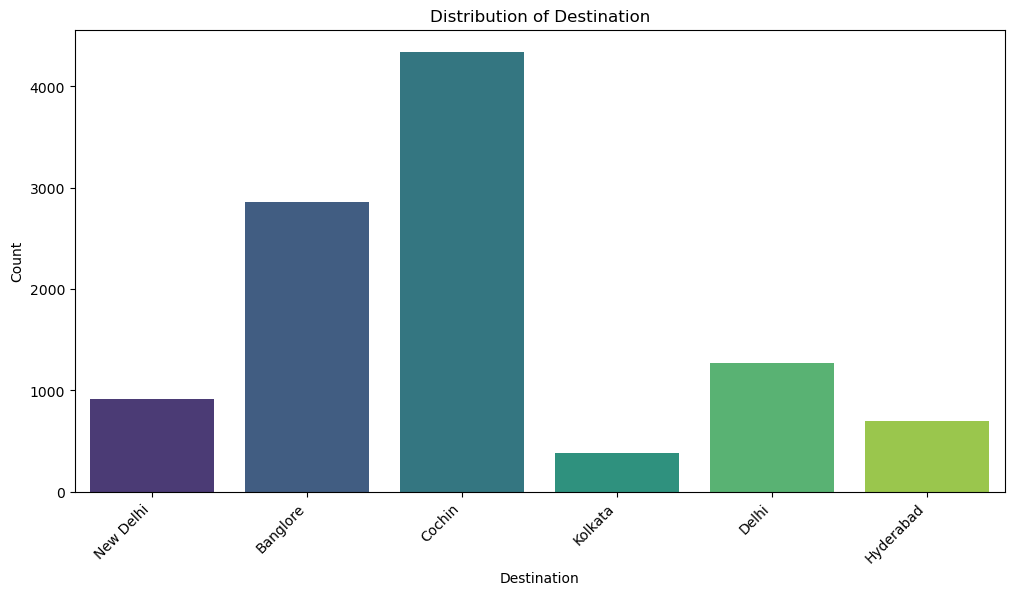

In [144]:
destination_counts = df['Destination'].value_counts()
plt.figure(figsize=(12,6))
sns.countplot(x='Destination',data=df,palette='viridis')
plt.title('Distribution of Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show

prefered_destination=destination_counts.idxmax()

print (f"\nThe destination with the maximum number of flights landing is {prefered_destination}\n" )

## As shown in the graph, The destination with the maximum number of flights landing is Cochin

# Q.3) Compare independent features with Target feature to check the impact on price
### a) Which airline has the highest price


The airline has the Highest Price is Jet Airways Business


The highest Price is 79512



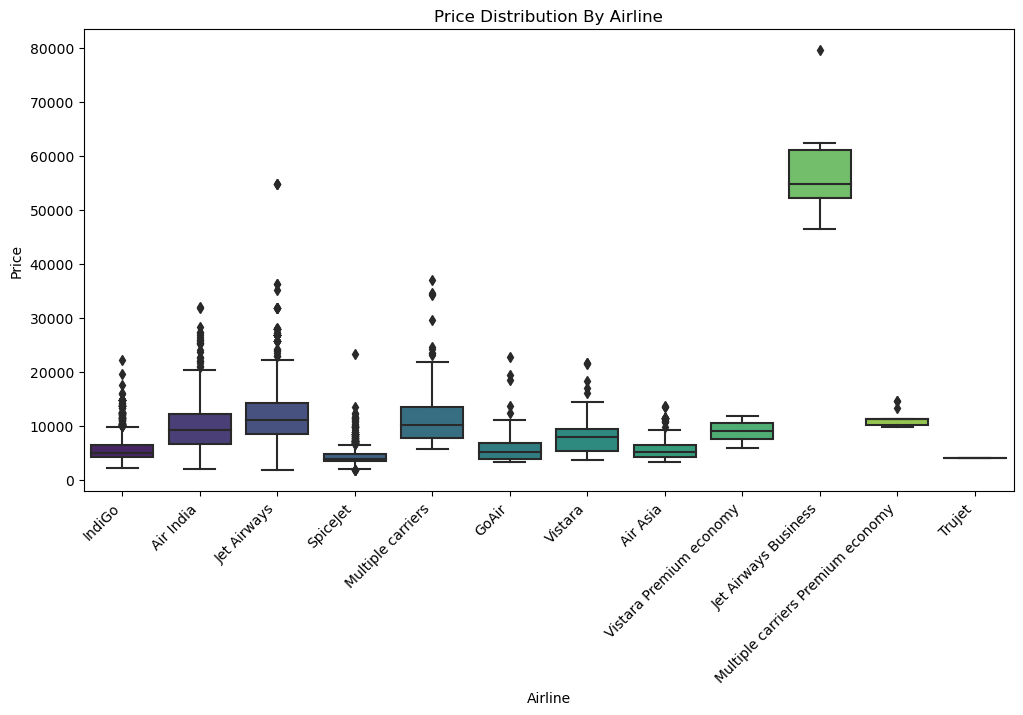

In [145]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Airline',y='Price',data=df,palette='viridis')
plt.title('Price Distribution By Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45,ha='right')
plt.show

highest_price_airline=df.groupby('Airline')['Price'].max().idxmax()
highest_max_price = df. groupby('Airline')['Price'].max().max()

print (f"\nThe airline has the Highest Price is {highest_price_airline}\n" )
print (f"\nThe highest Price is {highest_max_price}\n" )

## b) Check if the business class flights are high price or low and find only those flights which price is higher than 50k

In [146]:
class_flight = df[df['Additional_Info']=='Business class']
class_flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Depature_Hour,Depature_Min,Arrival_Hour,Arrival_Min,Depature_Timezone,arrival_Timezone
2924,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45:00,11:25:00,5h 40m,1 stop,Business class,79512,3,1,2019,5,45,11,25,Early Morning,Morning
3032,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BDQ → DEL,05:50:00,12:20:00,6h 30m,1 stop,Business class,28097,3,1,2019,5,50,12,20,Early Morning,Morning
5372,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45:00,12:25:00,6h 40m,1 stop,Business class,62427,3,1,2019,5,45,12,25,Early Morning,Morning
10364,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,09:45:00,14:25:00,4h 40m,1 stop,Business class,57209,3,1,2019,9,45,14,25,Morning,Noon


In [147]:
highest_class_flights = class_flight[class_flight['Price']> 50000]
highest_class_flights

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Depature_Hour,Depature_Min,Arrival_Hour,Arrival_Min,Depature_Timezone,arrival_Timezone
2924,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45:00,11:25:00,5h 40m,1 stop,Business class,79512,3,1,2019,5,45,11,25,Early Morning,Morning
5372,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,05:45:00,12:25:00,6h 40m,1 stop,Business class,62427,3,1,2019,5,45,12,25,Early Morning,Morning
10364,Jet Airways Business,2019-01-03,Banglore,New Delhi,BLR → MAA → DEL,09:45:00,14:25:00,4h 40m,1 stop,Business class,57209,3,1,2019,9,45,14,25,Morning,Noon


In [148]:
print ("Flights which price is higher than 50k are : ")
print (highest_class_flights[['Airline','Date_of_Journey','Source','Destination','Price']])

Flights which price is higher than 50k are : 
                    Airline Date_of_Journey    Source Destination  Price
2924   Jet Airways Business      2019-01-03  Banglore   New Delhi  79512
5372   Jet Airways Business      2019-01-03  Banglore   New Delhi  62427
10364  Jet Airways Business      2019-01-03  Banglore   New Delhi  57209


# Q.4) Perform encoding for the required features according to the data.

In [149]:
df=df.drop(['Route'],axis=1)

In [150]:
df=df.drop(['Depature_Hour'],axis=1)

In [151]:
 df=df.drop(['Depature_Min'],axis=1)

In [152]:
 df=df.drop(['Arrival_Hour'],axis=1)

In [153]:
 df=df.drop(['Arrival_Min'],axis=1)

In [154]:
 df=df.drop(['Date_of_Journey'],axis=1)

In [155]:
 df=df.drop(['Depature_Timezone'],axis=1)

In [156]:
 df=df.drop(['arrival_Timezone'],axis=1)

In [157]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,22:20:00,01:10:00,2h 50m,non-stop,No info
1,Air India,Kolkata,Banglore,05:50:00,13:15:00,7h 25m,2 stops,No info
2,Jet Airways,Delhi,Cochin,09:25:00,04:25:00,19h,2 stops,No info
3,IndiGo,Kolkata,Banglore,18:05:00,23:30:00,5h 25m,1 stop,No info
4,IndiGo,Banglore,New Delhi,16:50:00,21:35:00,4h 45m,1 stop,No info


In [158]:
df_num = df.select_dtypes(include=[np.number])
df_num.head()

,Price,Day,Month,Year
0,3897,24,3,2019
1,7662,5,1,2019
2,13882,6,9,2019
3,6218,5,12,2019
4,13302,3,1,2019


In [159]:
from sklearn.preprocessing import LabelEncoder
df_cat = df_cat.apply(LabelEncoder().fit_transform)
df_cat

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3,0,5,211,12,240,4,8
1,1,3,0,31,104,336,1,8
2,4,2,1,70,30,106,1,8
3,3,3,0,164,217,311,0,8
4,3,0,5,149,194,303,0,8
...,...,...,...,...,...,...,...,...
10678,0,3,0,183,204,236,4,8
10679,1,3,0,193,215,237,4,8
10680,4,0,2,58,83,280,4,8
10681,10,0,5,92,114,238,4,8


In [160]:
final_df = pd. concat ([df_cat,df_num],axis=1)
final_df.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,3,0,5,211,12,240,4,8,3897,24,3,2019
1,1,3,0,31,104,336,1,8,7662,5,1,2019
2,4,2,1,70,30,106,1,8,13882,6,9,2019
3,3,3,0,164,217,311,0,8,6218,5,12,2019
4,3,0,5,149,194,303,0,8,13302,3,1,2019


In [161]:
 final_df['Price']= np.sqrt(final_df['Price'])

# Q.5) Build multiple model by using different algorithm such as Linear Regression, Decision Tree, and Random Forest etc. and check the performance of your model.

In [162]:
from sklearn.feature_selection import mutual_info_regression

In [163]:
x = final_df.drop(['Price'],axis = 1)
y = final_df[['Price']]

In [164]:
imp=mutual_info_regression(x,y)

In [165]:
imp=pd.DataFrame(mutual_info_regression(x,y),index=x.columns)
imp.columns=['importance']

In [166]:
imp

,importance
Airline,0.904616
Source,0.970637
Destination,0.754718
Dep_Time,0.291482
Arrival_Time,0.344279
Duration,0.568012
Total_Stops,0.554816
Additional_Info,0.511718
Day,0.188431
Month,0.234851


In [167]:
imp.sort_values(by='importance',ascending=False)

,importance
Source,0.970637
Airline,0.904616
Destination,0.754718
Duration,0.568012
Total_Stops,0.554816
Additional_Info,0.511718
Arrival_Time,0.344279
Dep_Time,0.291482
Month,0.234851
Day,0.188431


In [168]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=145)

In [169]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.metrics import accuracy_score,mean_squared_error

In [170]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
linear_predictions = linear_model.predict(x_test)

In [171]:
dt_model = DecisionTreeRegressor(random_state=62)
dt_model.fit(x_train, y_train)
dt_predictions = dt_model.predict(x_test)

In [172]:
rf_model = RandomForestRegressor(random_state= 78)
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)

In [173]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)

In [174]:
gb_model = GradientBoostingRegressor(random_state= 49)
gb_model.fit(x_train, y_train)
gb_predictions = gb_model.predict(x_test)

In [175]:
xgb_model = XGBRegressor(random_state= 49)
xgb_model.fit(x_train, y_train)
xgb_predictions = xgb_model.predict(x_test)

In [176]:
ada_model = AdaBoostRegressor(random_state= 49)
ada_model.fit(x_train, y_train)
ada_predictions = ada_model.predict(x_test)

In [177]:
ridge_model=Ridge()
ridge_model.fit(x_train, y_train)
ridge_predictions = ridge_model.predict(x_test)

In [178]:
lasso_model=Ridge()
lasso_model.fit(x_train, y_train)
lasso_predictions = lasso_model.predict(x_test)

In [179]:
def evaluate_model(predictions,model_name):
    mse = mean_squared_error(y_test,predictions)
    r2 = r2_score(y_test,predictions)
    print(f"{model_name} - Mean Squared Error : {mse:.2f}, R-Squared: {r2:.4f}")

In [180]:
regressors=[['Linear Regression :',LinearRegression()],
            ['Decision Tree Regression :',DecisionTreeRegressor()],
            ['Random Forest Regression :',RandomForestRegressor()],
            ['K-Nearest Neighbors :',KNeighborsRegressor()],
            ['Gradient Boosting :',GradientBoostingRegressor()],
            ['XGBoost  :',XGBRegressor()],
            ['AdaBoost :',AdaBoostRegressor()],
            ['Ridge Regression :',Ridge()],
            ['Lasso Regression :',Lasso()]]
for name, model in regressors:
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    evaluate_model(predictions, name)
reg_pred=[]    
r2_results=[]    
    

print('\nResults...\n')
for name,model in regressors:
    model=model
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    rmse=np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rmse)
    
    r2 = r2_score(y_test, predictions)    
    r2_percent = r2*100
    r2_results.append(r2_percent)
    
    print(f"{name}\n RMSE :{rmse:.2f}")
    print(f" R-squared : {r2_percent:.2f}%")

Linear Regression : - Mean Squared Error : 306.18, R-Squared: 0.4382
Decision Tree Regression : - Mean Squared Error : 78.11, R-Squared: 0.8567
Random Forest Regression : - Mean Squared Error : 47.65, R-Squared: 0.9126
K-Nearest Neighbors : - Mean Squared Error : 198.62, R-Squared: 0.6355
Gradient Boosting : - Mean Squared Error : 80.94, R-Squared: 0.8515
XGBoost  : - Mean Squared Error : 47.17, R-Squared: 0.9135
AdaBoost : - Mean Squared Error : 243.25, R-Squared: 0.5537
Ridge Regression : - Mean Squared Error : 306.18, R-Squared: 0.4382
Lasso Regression : - Mean Squared Error : 309.15, R-Squared: 0.4328

Results...

Linear Regression :
 RMSE :17.50
 R-squared : 43.82%
Decision Tree Regression :
 RMSE :8.71
 R-squared : 86.07%
Random Forest Regression :
 RMSE :6.87
 R-squared : 91.34%
K-Nearest Neighbors :
 RMSE :14.09
 R-squared : 63.55%
Gradient Boosting :
 RMSE :9.00
 R-squared : 85.15%
XGBoost  :
 RMSE :6.87
 R-squared : 91.35%
AdaBoost :
 RMSE :15.52
 R-squared : 55.81%
Ridge Reg

In [181]:
# from sklearn.ensemble import RandomForestRegressor

In [182]:
# from sklearn.tree import DecisionTreeRegressor

In [183]:
 from sklearn.ensemble import GradientBoostingRegressor

In [184]:
# ml_model=RandomForestRegressor()

In [185]:
# DT_model= DecisionTreeRegressor()

In [186]:
GB_model= GradientBoostingRegressor()

In [187]:
# ml_model.fit(x_train,y_train)

In [188]:
# DT_model.fit(x_train,y_train)

In [189]:
GB_model.fit(x_train,y_train)

GradientBoostingRegressor()

In [190]:
# y_pred=ml_model.predict(x_test)
# y_pred

In [191]:
# y_pred=DT_model.predict(x_test)
# y_pred

In [192]:
y_pred=GB_model.predict(x_test)
y_pred

array([119.8844453 ,  69.94504246, 101.21375138, ..., 103.1734606 ,
        79.38361531, 122.30887497])

In [193]:
y_pred.shape

(3139,)

In [194]:
len(x_test)

3139

In [195]:
from sklearn import metrics

In [196]:
metrics.r2_score(y_test,y_pred)

0.851487559119527

# Q.6) Compare all of the models and justify your choice about the optimum model by using different evaluation technique and tune the models as per the requirement.

In [197]:
y_ax=['Linear Regression','Decision Tree Regression', 'Random Forest Regression','K-Nearest Neighbors','Gradient Boosting','XGBoost','AdaBoost','Ridge Regression','Lasso Regression' ]
x_ax=reg_pred

<Axes: >

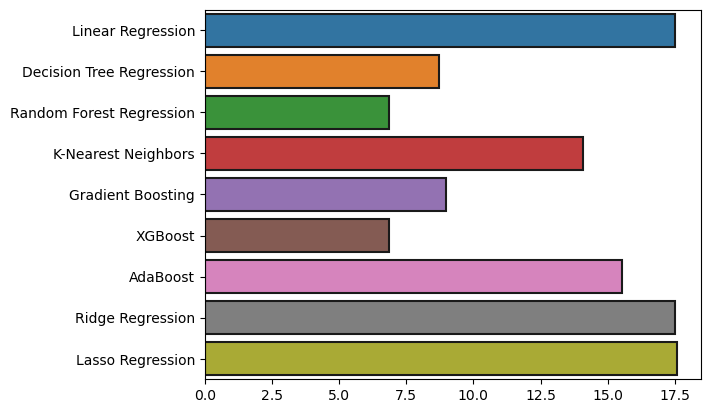

In [198]:
sns.barplot(x=x_ax,y=y_ax,linewidth=1.5,edgecolor="0.1")

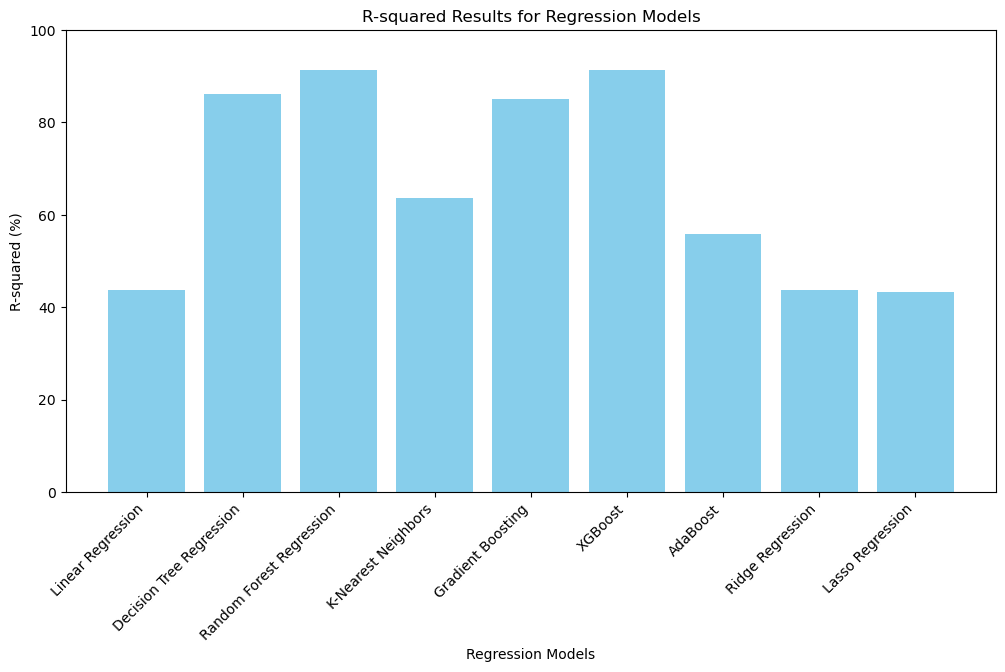

In [199]:
plt.figure(figsize=(12, 6))
plt.bar([name.split(':')[0].strip() for name, _ in regressors], r2_results, color='skyblue')
plt.title('R-squared Results for Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('R-squared (%)')
plt.ylim(0,100)
plt.xticks(rotation=45, ha='right')
plt.show()

# Justification for the optimum model
### Based on the accuracy of the models above,
### Decision Tree with 85.5% accuracy
### Random Forest with 91.21% accuracy
### Gradient Boosting with 85.15% accuracy
### Extreme Boosting(XGBoost) with 91.35% accuracy
### Random Forest and XGBoost has accuracy more than 91% which trends to overfitting.
### Decision Tree with 85.5% accuracy, (a lower advancement of Random Forest) contains only one tree which is not suitable for the model when live data is given to model
### Therefore Gradient Boosting is considered as it provides high accuracy than individual decision trees. Due to the presence of hypertuning parameter og gradient boost which is learning rate helps to control overfitting which is important when dataset is large.

In [200]:
import pickle
with open('adv_ml_model.pkl','wb') as file:
    pickle.dump(GB_model,file)

In [201]:
with open('adv_ml_model.pkl','rb') as file:
       forest =  pickle.load(file)

In [202]:
y_pred2 = forest.predict(x_test)
r2_score_value = metrics.r2_score(y_test, y_pred2)

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_value = mape(y_test, y_pred2)

print(f'R-squared Score: {r2_score_value:.4f}')
print(f'MAPE: {mape_value:.2f}%')

R-squared Score: 0.8515
MAPE: 28.95%


In [203]:
from sklearn.model_selection import RandomizedSearchCV

In [204]:
# reg_rf=RandomForestRegressor()

In [205]:
reg_gb=GradientBoostingRegressor()

In [206]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [207]:
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]
max_features=["auto","sqrt"]
max_depth=[int(x)for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,100]

In [208]:
gradient_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split}

In [209]:
gradient_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [210]:
gb_Gradient=RandomizedSearchCV(reg_gb,param_distributions=gradient_grid,cv=3,verbose=2,n_jobs=-1)

In [211]:
gb_Gradient.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [212]:
gb_Gradient.best_estimator_

GradientBoostingRegressor(max_depth=5, max_features='sqrt',
                          min_samples_split=15, n_estimators=1080)

In [213]:
gb_Gradient.best_score_

0.9109231464265223

In [214]:
df.head(5)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,22:20:00,01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50:00,13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,09:25:00,04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,18:05:00,23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,16:50:00,21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


# Q.7) Write a conclusion from the business point of view. Finally perform the same preprocessing technique for test data best practice using pipeline.

In [215]:
df_test_data = pd.read_excel(r"C:\Users\Yash Pardeshi\Downloads\advanced ML LMS\Flight_Price_Test.xlsx")
df_test_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [216]:
Live_data = x_test.iloc[0:4,:]
Live_data

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year
2855,4,2,1,178,96,94,1,8,6,9,2019
10597,4,0,2,132,158,241,4,5,21,4,2019
6084,1,0,5,207,80,47,0,8,3,9,2019
8951,6,2,1,65,188,35,0,8,27,3,2019


In [217]:
Live_data['Predict']=GB_model.predict(Live_data)
Live_data

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year,Predict
2855,4,2,1,178,96,94,1,8,6,9,2019,119.884445
10597,4,0,2,132,158,241,4,5,21,4,2019,69.945042
6084,1,0,5,207,80,47,0,8,3,9,2019,101.213751
8951,6,2,1,65,188,35,0,8,27,3,2019,97.182747


# Business Interpretation
- Based on the insights (Considering Business for Air India).
- Customers tends to travel the most during early morning and reach destination during Evening, where we have oppourtunity to sheducle most of our flights during these timezone at an attractive price.
- Keeping business class as low as possible as most of the customer prefer travelling in economic class. Also prices of business class should be raised.
- Travel time also affects the prices, therefore we can schedule flights for moderate travelling hours. Also providing more than one stop should be charged less to attract customers.
- Cochin and Banglore has the maximum arrival of customers, therefore more flights should be scheduled on these destinations.
- Effective use of aeroplanes can be achieved providing atleast one stop on the routes/destination.